In [98]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
daily_data = pd.DataFrame(pd.read_csv("daily_data_seasonality.csv",header=0, index_col=0, parse_dates=True, squeeze=True))
    
array_data = np.array(daily_data[["Consumption","Religious Holidays"]])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(array_data)

timestep = 21
def shapedArray(timestep,feature_count,data):
    bombos = np.zeros((len(data)-timestep,timestep,feature_count))
    for row in range(len(data)-(timestep)):
        for i in range(timestep):
            bombos[row][i] = data[row+i]
    return bombos

data_X = shapedArray(timestep,array_data.shape[1],scaled_data)
data_Y = scaled_data[timestep:,0]
train_size= 365*3+1
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

In [99]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model_14 = Sequential()
model_14.add(SimpleRNN(50, input_shape=(timestep,array_data.shape[1])))

model_14.add(Dense(1))
model_14.compile(loss = 'mean_squared_error',optimizer= opt)

model_14.fit(train_X,train_Y,epochs=750)
model_14.summary()
predictions = model_14.predict(test_X)

Epoch 1/750
35/35 [==============================] - 0s 5ms/step - loss: 0.0497
Epoch 2/750
35/35 [==============================] - 0s 5ms/step - loss: 0.0276
Epoch 3/750
35/35 [==============================] - 0s 4ms/step - loss: 0.0207
Epoch 4/750
35/35 [==============================] - 0s 4ms/step - loss: 0.0166
Epoch 5/750
35/35 [==============================] - 0s 4ms/step - loss: 0.0137
Epoch 6/750
35/35 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 7/750
35/35 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 8/750
35/35 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 9/750
35/35 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 10/750
35/35 [==============================] - 0s 4ms/step - loss: 0.0085
Epoch 11/750
35/35 [==============================] - 0s 4ms/step - loss: 0.0082
Epoch 12/750
35/35 [==============================] - 0s 4ms/step - loss: 0.0082
Epoch 13/750
35/35 [=================

In [102]:
bos = np.zeros((len(predictions),array_data.shape[1]))
for i,val in enumerate(predictions):
  bos[i,0] = val

In [103]:

predictions_real = scaler.inverse_transform(bos)[:,0]
real_Y = array_data[train_size+timestep:,0]
errors = real_Y - predictions_real
perc_err = errors/real_Y
abs_perc_err = abs(perc_err)
mape = abs_perc_err.mean()*100
print(mape)

2.2968201535489494


In [104]:
errors

array([-9.53007576e+03,  6.77625654e+03, -4.92479810e+03, -5.21636327e+03,
        2.03606808e+04, -1.68363402e+04, -8.12170937e+03,  1.81449279e+04,
        6.27903222e+03,  7.65436270e+02, -1.32571069e+04, -6.88969502e+03,
       -4.13096506e+03,  7.88232613e+03,  3.26304953e+04,  9.72261214e+03,
        3.30653143e+02,  1.92067751e+03, -1.28635780e+04, -1.79631969e+04,
       -8.11638319e+02,  1.29887226e+04,  3.19647563e+03,  2.14187251e+03,
       -1.32099841e+04, -2.47555367e+04,  1.98310902e+04, -7.94457494e+03,
       -1.43906626e+04, -9.65904603e+03,  1.84272490e+03,  2.99700306e+04,
        9.42282243e+03,  1.53605767e+04, -1.60979760e+03, -2.51404592e+03,
       -1.11876275e+04, -4.10009640e+04,  4.89998984e+02,  1.04479692e+04,
        6.91624644e+03, -2.20465041e+04, -5.62708730e+03, -1.86817176e+04,
       -6.06140980e+03, -8.03521725e+03, -5.92363729e+03, -8.17869271e+03,
        4.23571958e+04, -2.51134689e+02,  9.53909090e+03,  2.21538313e+04,
       -1.33369600e+04, -

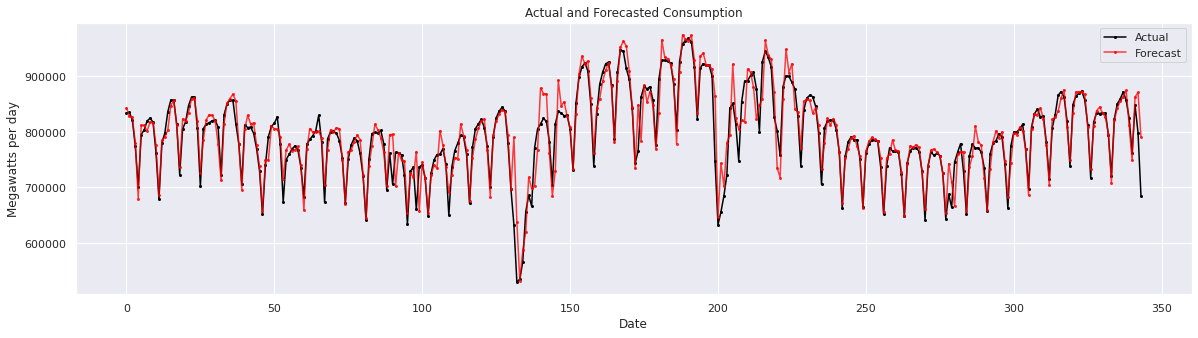

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20, 5)})

plt.plot(real_Y,color="black", marker="o",markersize=2)
plt.plot(predictions_real,color="red",marker="o",markersize=2,alpha=0.75)

plt.title("Actual and Forecasted Consumption")
plt.ylabel("Megawatts per day")
plt.xlabel("Date")
plt.legend(['Actual', 'Forecast']);
plt.savefig("comparison_of_the_best_model_and_actual_yearly.svg", format="svg")
plt.show()